In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from prophet import Prophet


TypeError: This is a python-holidays entity loader class. For entity inheritance purposes please import a class you want to derive from directly: e.g., `from holidays.countries import Entity` or `from holidays.financial import Entity`.

In [111]:
df = pd.read_csv("consumption_temp.csv")
df

,time,location,consumption,temperature
0,2022-04-07 21:00:00,bergen,1.113325,-0.3
1,2022-04-07 21:00:00,oslo,4.092830,1.0
2,2022-04-07 21:00:00,stavanger,2.057858,1.3
3,2022-04-07 21:00:00,tromsø,1.246582,-3.9
4,2022-04-07 21:00:00,trondheim,1.970098,-2.8
...,...,...,...,...
49489,2023-04-02 21:00:00,helsingfors,6.333000,-1.1
49490,2023-04-02 21:00:00,oslo,12.134655,-1.1
49491,2023-04-02 21:00:00,stavanger,5.622820,0.5
49492,2023-04-02 21:00:00,tromsø,2.018333,-2.5


In [114]:
df[df["consumption"] == 0]

,time,location,consumption,temperature,bergen,oslo,stavanger,tromsø,trondheim,helsingfors
11761,2022-07-14 21:00:00,helsingfors,0.0,15.800000,0,1,0,0,0,0
11767,2022-07-14 22:00:00,helsingfors,0.0,15.400000,0,1,0,0,0,0
11773,2022-07-14 23:00:00,helsingfors,0.0,15.500000,0,1,0,0,0,0
11779,2022-07-15 00:00:00,helsingfors,0.0,15.300000,0,1,0,0,0,0
11785,2022-07-15 01:00:00,helsingfors,0.0,14.800000,0,1,0,0,0,0
11791,2022-07-15 02:00:00,helsingfors,0.0,14.900000,0,1,0,0,0,0
11797,2022-07-15 03:00:00,helsingfors,0.0,14.300000,0,1,0,0,0,0
11803,2022-07-15 04:00:00,helsingfors,0.0,14.600000,0,1,0,0,0,0
11809,2022-07-15 05:00:00,helsingfors,0.0,14.300000,0,1,0,0,0,0
11815,2022-07-15 06:00:00,helsingfors,0.0,14.100000,0,1,0,0,0,0


In [113]:
ohe = OneHotEncoder()
locations = df["location"].unique()

df[locations] = pd.get_dummies(df["location"]).astype(int)
df["time"] = pd.to_datetime(df["time"])


In [56]:
t = df.isna()


In [66]:
df['time'].dt.hour.values

array([21, 21, 21, ..., 21, 21, 21], dtype=int32)

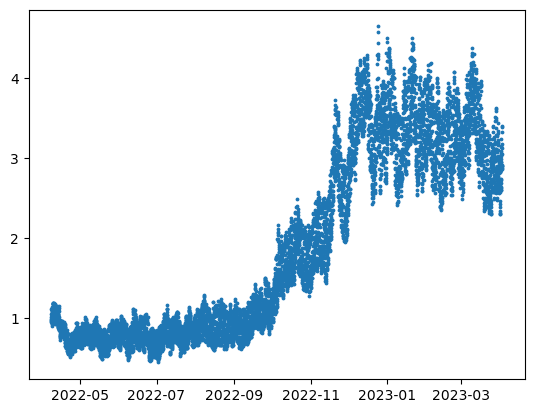

In [105]:
plot_data = df[df["location"] == "bergen"].copy()

plt.scatter(plot_data['time'], plot_data['consumption'].values, s=3)

In [110]:
df[df["consumption"] == 0 ]


,time,location,consumption,temperature,bergen,oslo,stavanger,tromsø,trondheim,helsingfors
11761,2022-07-14 21:00:00,helsingfors,0.0,15.800000,0,1,0,0,0,0
11767,2022-07-14 22:00:00,helsingfors,0.0,15.400000,0,1,0,0,0,0
11773,2022-07-14 23:00:00,helsingfors,0.0,15.500000,0,1,0,0,0,0
11779,2022-07-15 00:00:00,helsingfors,0.0,15.300000,0,1,0,0,0,0
11785,2022-07-15 01:00:00,helsingfors,0.0,14.800000,0,1,0,0,0,0
11791,2022-07-15 02:00:00,helsingfors,0.0,14.900000,0,1,0,0,0,0
11797,2022-07-15 03:00:00,helsingfors,0.0,14.300000,0,1,0,0,0,0
11803,2022-07-15 04:00:00,helsingfors,0.0,14.600000,0,1,0,0,0,0
11809,2022-07-15 05:00:00,helsingfors,0.0,14.300000,0,1,0,0,0,0
11815,2022-07-15 06:00:00,helsingfors,0.0,14.100000,0,1,0,0,0,0


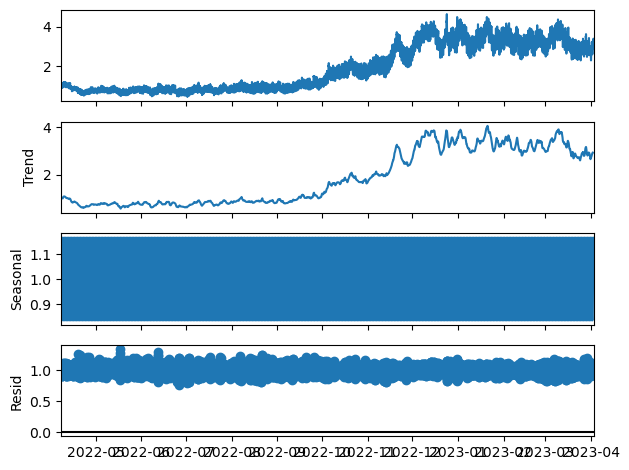

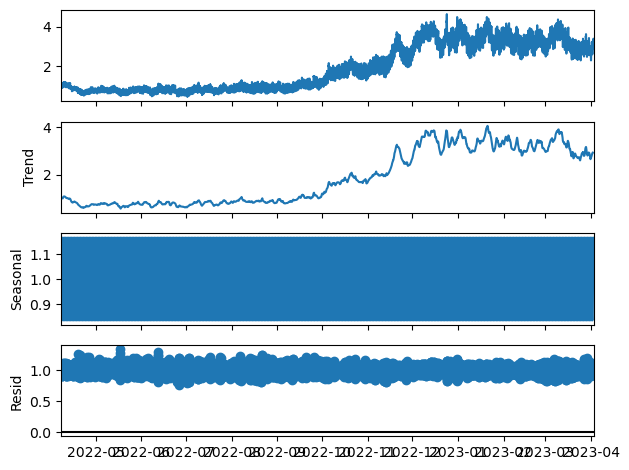

In [97]:
from statsmodels.tsa.seasonal import seasonal_decompose

plot_data = df[df["location"] == "bergen"].copy().set_index('time')

analysis = plot_data[['consumption']].copy()

decompose_result_mult = seasonal_decompose(analysis, model="multiplicative")

trend = decompose_result_mult.trend
seasonal = decompose_result_mult.seasonal
residual = decompose_result_mult.resid

decompose_result_mult.plot()